In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# read in raw BKG data

ra_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-TOTALnew01.npz')
ra_BKG = ra_dat['datTOTALnew']
print('ra done')

dec_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-TOTALnew01.npz')
dec_BKG = dec_dat['datTOTALnew']
print('dec done')

maskbits_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/maskbitsBKG-TOTALnew01.npz')
maskbits_BKG = maskbits_dat['datTOTALnew']
print('maskbits done')

gflux_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gfluxBKG-TOTALnew01.npz')
gflux_BKG = gflux_dat['datTOTALnew']
print('gflux done')

rflux_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rfluxBKG-TOTALnew01.npz')
rflux_BKG = rflux_dat['datTOTALnew']
print('rflux done')

zflux_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zfluxBKG-TOTALnew01.npz')
zflux_BKG = zflux_dat['datTOTALnew']
print('zflux done')

mw_trans_g_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/mw_transmission_g_BKG-TOTALnew01.npz')
mw_trans_g_BKG = mw_trans_g_dat['datTOTALnew']
print('g transmission done')

mw_trans_r_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/mw_transmission_r_BKG-TOTALnew01.npz')
mw_trans_r_BKG = mw_trans_r_dat['datTOTALnew']
print('r transmission done')

mw_trans_z_dat = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/mw_transmission_z_BKG-TOTALnew01.npz')
mw_trans_z_BKG = mw_trans_z_dat['datTOTALnew']
print('z transmission done')





ra done
dec done
maskbits done
gflux done
rflux done
zflux done
g transmission done
r transmission done
z transmission done


In [3]:
# read in raw LRG data

ra_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/ra_LRGs-000-060-dr9-0.npz')
print(ra_data.files)
ra_LRG = ra_data['ra_LRG']
print(ra_data)
print(len(ra_LRG))
print('ra done')

dec_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/dec_LRGs-000-060-dr9-0.npz')
print(dec_data.files)
dec_LRG = dec_data['dec_LRG']
print('dec done')

z_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/z_LRG-000-060-dr9-0.npz')
print(z_data.files)
z_LRG = z_data['z_LRG']
print('dec done')

maskbits_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/maskbits_LRGs-020-060-dr9-0.npz')
print(maskbits_data.files)
maskbits_LRG = maskbits_data['maskbits_LRG']
print(len(maskbits_LRG))
print('maskbits done')

gflux_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/gflux_LRG-000-060-dr9-0.npz')
gflux_LRG = gflux_data['gflux_LRG']
print('gflux done')

rflux_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/rflux_LRG-000-060-dr9-0.npz')
rflux_LRG = rflux_data['rflux_LRG']
print('rflux done')

zflux_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/zflux_LRG-000-060-dr9-0.npz')
zflux_LRG = zflux_data['zflux_LRG']
print('zflux done')

mw_trans_g_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/mw_transmission_g_LRGs-000-060-dr9-0.npz')
mw_trans_g_LRG = mw_trans_g_data['mw_transmission_g_LRG']
print('g transmission done')

mw_trans_r_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/mw_transmission_r_LRGs-000-060-dr9-0.npz')
mw_trans_r_LRG = mw_trans_r_data['mw_transmission_r_LRG']
print('r transmission done')

mw_trans_z_data = np.load('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/LRG/mw_transmission_z_LRGs-000-060-dr9-0.npz')
mw_trans_z_LRG = mw_trans_z_data['mw_transmission_z_LRG']
print('z transmission done')



ra_dat.close()
dec_dat.close()
maskbits_dat.close()
gflux_dat.close()
rflux_dat.close()
zflux_dat.close()
mw_trans_g_dat.close()
mw_trans_r_dat.close()
mw_trans_z_dat.close()


ra_data.close()
dec_data.close()
z_data.close()
maskbits_data.close()
gflux_data.close()
rflux_data.close()
zflux_data.close()
mw_trans_g_data.close()
mw_trans_r_data.close()
mw_trans_z_data.close()


['ra_LRG']
793680
ra done
['dec_LRG']
dec done
['z_LRG']
dec done
['maskbits_LRG']
793680
maskbits done
gflux done
rflux done
zflux done
g transmission done
r transmission done
z transmission done


In [4]:
# make maskbits cuts

maskbits_LRG = (((maskbits_LRG & 2**1)==0) & ((maskbits_LRG & 2**11)==0) & ((maskbits_LRG & 2**12)==0) & 
                ((maskbits_LRG & 2**13)==0) & ((maskbits_LRG & 2**5)==0) & ((maskbits_LRG & 2**6)==0) & 
                ((maskbits_LRG & 2**7)==0))

maskbits_BKG = (((maskbits_BKG & 2**1)==0) & ((maskbits_BKG & 2**11)==0) & ((maskbits_BKG & 2**12)==0) & 
                ((maskbits_BKG & 2**13)==0) & ((maskbits_BKG & 2**5)==0) & ((maskbits_BKG & 2**6)==0) & 
                ((maskbits_BKG & 2**7)==0))


# LRG

ra_LRG_maskbits = ra_LRG[maskbits_LRG]
dec_LRG_maskbits = dec_LRG[maskbits_LRG]
z_LRG_maskbits = z_LRG[maskbits_LRG]
gflux_LRG_maskbits = gflux_LRG[maskbits_LRG]
rflux_LRG_maskbits = rflux_LRG[maskbits_LRG]
zflux_LRG_maskbits = zflux_LRG[maskbits_LRG]
mw_trans_g_LRG_maskbits = mw_trans_g_LRG[maskbits_LRG]
mw_trans_r_LRG_maskbits = mw_trans_r_LRG[maskbits_LRG]
mw_trans_z_LRG_maskbits = mw_trans_z_LRG[maskbits_LRG]

print(len(ra_LRG_maskbits))


# BKG

ra_BKG_maskbits = ra_BKG[maskbits_BKG]
dec_BKG_maskbits = dec_BKG[maskbits_BKG]
gflux_BKG_maskbits = gflux_BKG[maskbits_BKG]
rflux_BKG_maskbits = rflux_BKG[maskbits_BKG]
zflux_BKG_maskbits = zflux_BKG[maskbits_BKG]
mw_trans_g_BKG_maskbits = mw_trans_g_BKG[maskbits_BKG]
mw_trans_r_BKG_maskbits = mw_trans_r_BKG[maskbits_BKG]
mw_trans_z_BKG_maskbits = mw_trans_z_BKG[maskbits_BKG]

print(len(mw_trans_g_BKG_maskbits))
print(len(ra_BKG_maskbits))


769723
424698907
424698907


In [28]:
ra = ra_BKG_maskbits
dec = dec_BKG_maskbits
trans_g = mw_trans_g_BKG_maskbits 
trans_r = mw_trans_r_BKG_maskbits 
trans_z = mw_trans_z_BKG_maskbits 



length phi:  424698907
pixnums:  [1156750 1156750 1156750 ...  320923  320923  320923]
1156750
length pixnums:  424698907


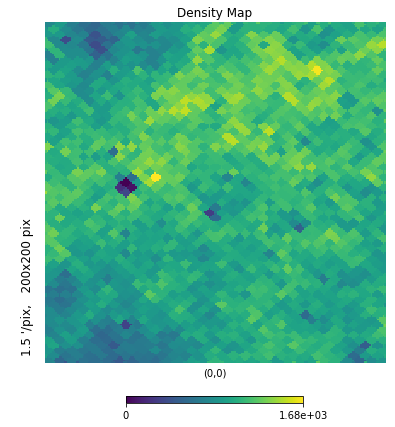

In [29]:
# The next couple of sections use healpix to plot galaxy properties

# Make HEALPix map using just RA/Dec; end up with a density plot
import healpy as hp

nside = 512
npixel = hp.nside2npix(nside)

# ra_cut = ra[np.where(zmag <= 21.5)]
# dec_cut = dec[np.where(zmag <= 21.5)]

# Convert ra/dec into theta/phi
theta = []
phi = []

for i in range(len(ra)):
    theta.append(np.radians(90. - dec[i]))
    phi.append(np.radians(ra[i]))

print('length phi: ', len(phi))
# Convert angles theta and phi to pixel numbers
pixnums = hp.ang2pix(nside, theta, phi, nest=True)
print('pixnums: ', pixnums)
print(pixnums[0])
print('length pixnums: ', len(pixnums))


# Create a HEALPix map from pix
mapp = np.bincount(pixnums, minlength=npixel)
# print('map where ne 0: ', mapp[np.where(mapp > 0)])
# print('length map == 0: ', len(mapp[np.where(mapp == 0)]))
# print('length map: ', len(mapp))

# masked_map = np.zeros(len(mapp))
# masked_map[(mapp == 0)] = 1

# m = hp.ma(mapp)
# m.mask = masked_map

# Plot mapp
# hp.gnomview(mapp, xsize=225, ysize=225, rot=(-116.5, 9.), flip='geo', nest=True, title='Density Map (nobs >= 2)')
hp.gnomview(mapp, flip='geo', nest=True, title='Density Map')
plt.show()



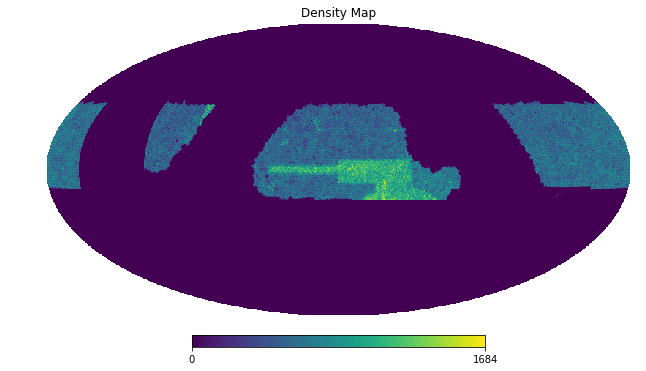

In [30]:
hp.mollview(mapp, flip='geo', nest=True, title='Density Map')
plt.show()

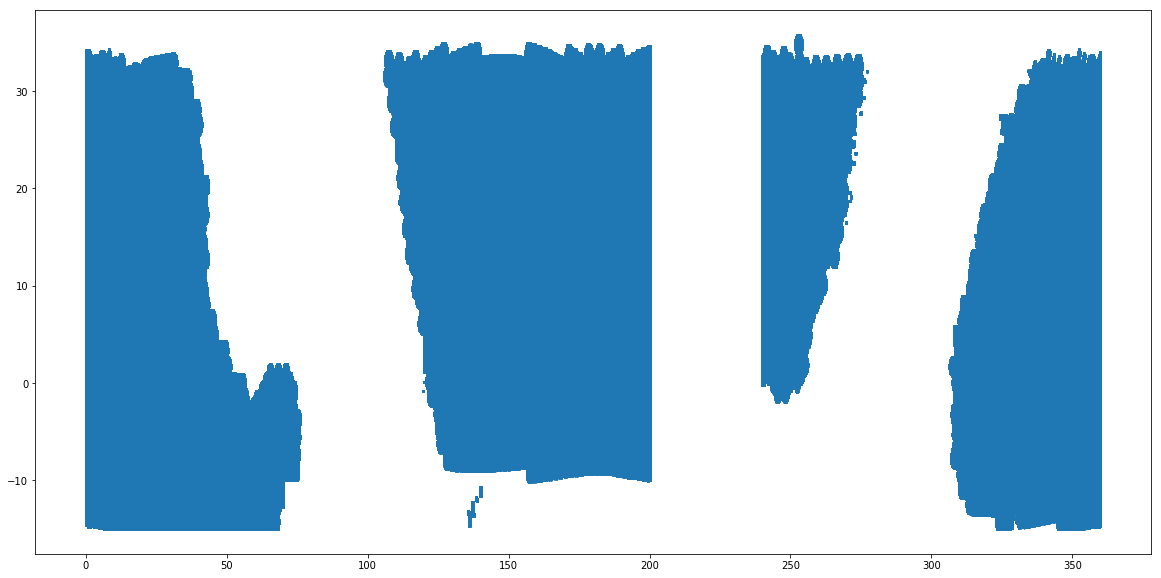

In [31]:
plt.figure(figsize=(20,10))
plt.scatter(ra, dec, s=2, alpha=1)
# plt.scatter(ra[np.where((ra>100) & (ra<150))], dec[np.where((ra>100) & (ra<150))], s=2)
plt.show()

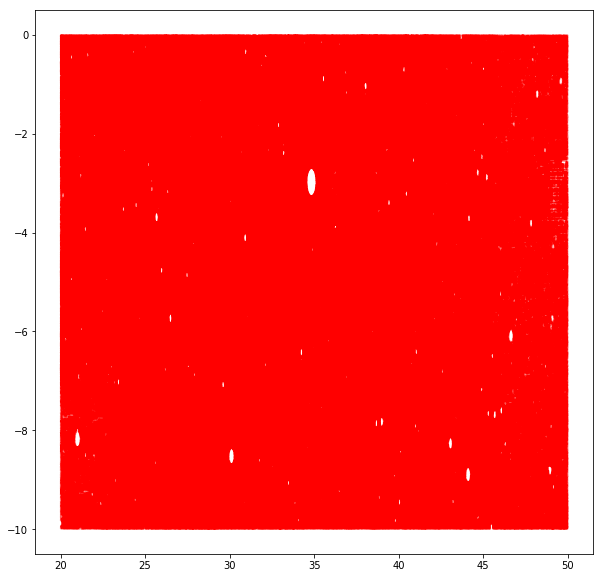

In [23]:
# plt.figure(figsize=(10,10))
# plt.scatter(ra[np.where((ra>=0.) & (ra<90.))], dec[np.where((ra>=0.) & (ra<90.))], s=2, alpha=0.2)
# plt.show()

plt.figure(figsize=(10,10))
plt.scatter(ra[np.where((ra>=20.) & (ra<50.) & (dec>=-10.) & (dec<0.))], dec[np.where((ra>=20.) & (ra<50.) & (dec>=-10.) & (dec<0.))], marker='o', facecolors='none', edgecolors='r', s=1, alpha=0.01)
plt.show()


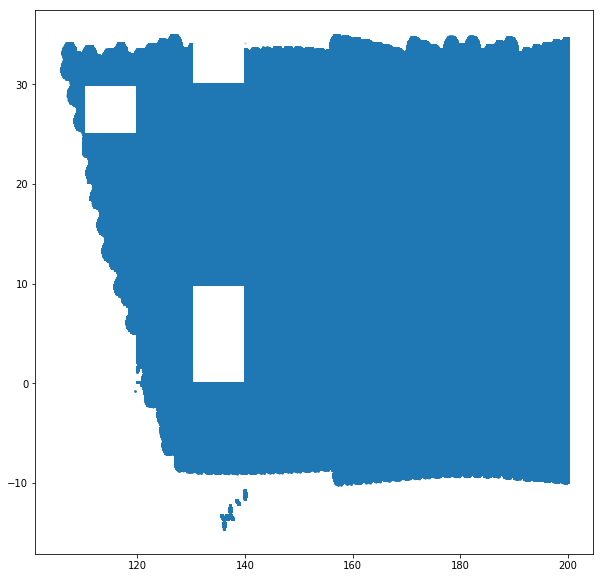

In [9]:
plt.figure(figsize=(10,10))
plt.scatter(ra[np.where((ra>=90.) & (ra<210.))], dec[np.where((ra>=90.) & (ra<210.))], s=2, alpha=0.2)
plt.show()


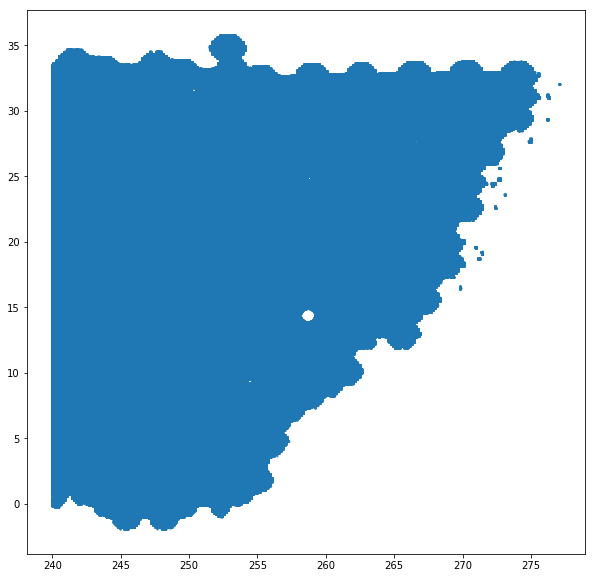

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(ra[np.where((ra>=210.) & (ra<280.))], dec[np.where((ra>=210.) & (ra<280.))], s=2, alpha=0.2)
plt.show()


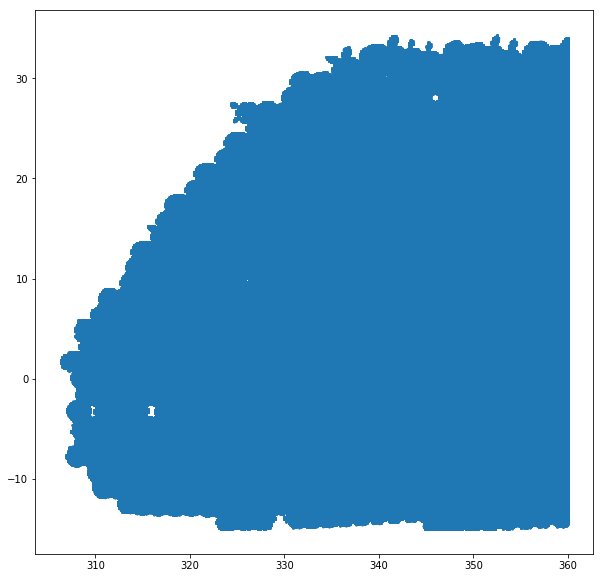

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(ra[np.where((ra>=280.) & (ra<=360.))], dec[np.where((ra>=280.) & (ra<=360.))], s=2, alpha=0.2)
plt.show()

In [33]:
# ra_bin0 = ra_BKG_maskbits[np.where((ra_BKG_maskbits>=0.) & (ra_BKG_maskbits<90.))] 
# ra_bin1 = ra_BKG_maskbits[np.where((ra_BKG_maskbits>=90.) & (ra_BKG_maskbits<210.))] 
# ra_bin2 = ra_BKG_maskbits[np.where((ra_BKG_maskbits>=210.) & (ra_BKG_maskbits<280.))]
# ra_bin3 = ra_BKG_maskbits[np.where((ra_BKG_maskbits>=280.) & (ra_BKG_maskbits<360.))]

# dec_bin0 = dec_BKG_maskbits[np.where((ra_BKG_maskbits>=0.) & (ra_BKG_maskbits<90.))]
# dec_bin1 = dec_BKG_maskbits[np.where((ra_BKG_maskbits>=90.) & (ra_BKG_maskbits<210.))] 
# dec_bin2 = dec_BKG_maskbits[np.where((ra_BKG_maskbits>=210.) & (ra_BKG_maskbits<280.))]
# dec_bin3 = dec_BKG_maskbits[np.where((ra_BKG_maskbits>=280.) & (ra_BKG_maskbits<360.))]

# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin0.npz', ra_bin0=ra_bin0)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin1.npz', ra_bin1=ra_bin1)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin2.npz', ra_bin2=ra_bin2)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin3.npz', ra_bin3=ra_bin3)

# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin0.npz', dec_bin0=dec_bin0)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin1.npz', dec_bin1=dec_bin1)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin2.npz', dec_bin2=dec_bin2)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin3.npz', dec_bin3=dec_bin3)



In [34]:
# mw_trans_g_BKG_bin0 = mw_trans_g_BKG_maskbits[np.where((ra_BKG_maskbits>=0.) & (ra_BKG_maskbits<90.))]
# mw_trans_g_BKG_bin1 = mw_trans_g_BKG_maskbits[np.where((ra_BKG_maskbits>=90.) & (ra_BKG_maskbits<210.))]
# mw_trans_g_BKG_bin2 = mw_trans_g_BKG_maskbits[np.where((ra_BKG_maskbits>=210.) & (ra_BKG_maskbits<280.))]
# mw_trans_g_BKG_bin3 = mw_trans_g_BKG_maskbits[np.where((ra_BKG_maskbits>=280.) & (ra_BKG_maskbits<360.))]

# mw_trans_r_BKG_bin0 = mw_trans_r_BKG_maskbits[np.where((ra_BKG_maskbits>=0.) & (ra_BKG_maskbits<90.))]
# mw_trans_r_BKG_bin1 = mw_trans_r_BKG_maskbits[np.where((ra_BKG_maskbits>=90.) & (ra_BKG_maskbits<210.))]
# mw_trans_r_BKG_bin2 = mw_trans_r_BKG_maskbits[np.where((ra_BKG_maskbits>=210.) & (ra_BKG_maskbits<280.))]
# mw_trans_r_BKG_bin3 = mw_trans_r_BKG_maskbits[np.where((ra_BKG_maskbits>=280.) & (ra_BKG_maskbits<360.))]

# mw_trans_z_BKG_bin0 = mw_trans_z_BKG_maskbits[np.where((ra_BKG_maskbits>=0.) & (ra_BKG_maskbits<90.))]
# mw_trans_z_BKG_bin1 = mw_trans_z_BKG_maskbits[np.where((ra_BKG_maskbits>=90.) & (ra_BKG_maskbits<210.))]
# mw_trans_z_BKG_bin2 = mw_trans_z_BKG_maskbits[np.where((ra_BKG_maskbits>=210.) & (ra_BKG_maskbits<280.))]
# mw_trans_z_BKG_bin3 = mw_trans_z_BKG_maskbits[np.where((ra_BKG_maskbits>=280.) & (ra_BKG_maskbits<360.))]


# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_g_BKG-bin0.npz', mw_trans_g_BKG_bin0=mw_trans_g_BKG_bin0)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_g_BKG-bin1.npz', mw_trans_g_BKG_bin1=mw_trans_g_BKG_bin1)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_g_BKG-bin2.npz', mw_trans_g_BKG_bin2=mw_trans_g_BKG_bin2)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_g_BKG-bin3.npz', mw_trans_g_BKG_bin3=mw_trans_g_BKG_bin3)

# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_r_BKG-bin0.npz', mw_trans_r_BKG_bin0=mw_trans_r_BKG_bin0)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_r_BKG-bin1.npz', mw_trans_r_BKG_bin1=mw_trans_r_BKG_bin1)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_r_BKG-bin2.npz', mw_trans_r_BKG_bin2=mw_trans_r_BKG_bin2)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_r_BKG-bin3.npz', mw_trans_r_BKG_bin3=mw_trans_r_BKG_bin3)

# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_z_BKG-bin0.npz', mw_trans_z_BKG_bin0=mw_trans_z_BKG_bin0)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_z_BKG-bin1.npz', mw_trans_z_BKG_bin1=mw_trans_z_BKG_bin1)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_z_BKG-bin2.npz', mw_trans_z_BKG_bin2=mw_trans_z_BKG_bin2)
# np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/trans_z_BKG-bin3.npz', mw_trans_z_BKG_bin3=mw_trans_z_BKG_bin3)


In [14]:
a, b = np.unique(ra, return_index = True)

print(len(a))
print(len(ra))

c, d = np.unique(dec, return_index = True)

print(len(c))
print(len(dec))

411560424
412726574
411560432
412726574


In [15]:
print(b[0:10])
print(d[0:10])

[ 3066776  6304342 18424012 16604416  3062129 20412783  2861628 12030362
 23287234 16666563]
[ 56641579  56639953  58238746 377781788 130393892 108059263 122311410
   7998431 105186003 106007862]


In [5]:
# # calculate LRG magnitudes

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG_maskbits/mw_trans_g_LRG_maskbits)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG_maskbits/mw_trans_r_LRG_maskbits)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG_maskbits/mw_trans_z_LRG_maskbits)

print(len(zmag_LRG_nocuts))
    
# # zmag_cut_test = np.concatenate([zmag_LRG_nocuts, zmag_BKG])
    
# # calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts

# # create full list of LRG attributes

ra_LRG_nocuts = ra_LRG_maskbits
dec_LRG_nocuts = dec_LRG_maskbits
z_LRG_nocuts = z_LRG_maskbits

# ra_nocuts = np.concatenate([ra_LRG_nocuts, ra_BKG_nocuts])
# dec_nocuts = np.concatenate([dec_LRG_nocuts, dec_BKG_nocuts])

# # cut for redshift

ra_LRG = ra_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]
dec_LRG = dec_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]
z_LRG = z_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]
gmag_LRG = gmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]
rmag_LRG = rmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]
zmag_LRG = zmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]
grcolor_LRG = grcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]
rzcolor_LRG = rzcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65))]

print(len(ra_LRG))





769723
673326


In [7]:
# # calculate BKG magnitudes

ra_BKG = ra_BKG_maskbits
dec_BKG = dec_BKG_maskbits

gmag_BKG = 22.5 - 2.5 * np.log10(gflux_BKG_maskbits/mw_trans_g_BKG_maskbits)
rmag_BKG = 22.5 - 2.5 * np.log10(rflux_BKG_maskbits/mw_trans_r_BKG_maskbits)
zmag_BKG = 22.5 - 2.5 * np.log10(zflux_BKG_maskbits/mw_trans_z_BKG_maskbits)

# # calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG = gmag_BKG - rmag_BKG
rzcolor_BKG = rmag_BKG - zmag_BKG

print(len(ra_BKG))


424698907


In [8]:
# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 

print(len(ra_LRG))
print(len(ra_BKG))
print(len(ra))

673326
424698907
425372233


In [9]:
# save BKG into four bins of RA

raBKG_bin0 = ra_BKG[np.where((ra_BKG>=0.) & (ra_BKG<90.))] 
raBKG_bin1 = ra_BKG[np.where((ra_BKG>=90.) & (ra_BKG<210.))] 
raBKG_bin2 = ra_BKG[np.where((ra_BKG>=210.) & (ra_BKG<280.))]
raBKG_bin3 = ra_BKG[np.where((ra_BKG>=280.) & (ra_BKG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin0.npz', raBKG_bin0=raBKG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin1.npz', raBKG_bin1=raBKG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin2.npz', raBKG_bin2=raBKG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raBKG-bin3.npz', raBKG_bin3=raBKG_bin3)



decBKG_bin0 = dec_BKG[np.where((ra_BKG>=0.) & (ra_BKG<90.))]
decBKG_bin1 = dec_BKG[np.where((ra_BKG>=90.) & (ra_BKG<210.))] 
decBKG_bin2 = dec_BKG[np.where((ra_BKG>=210.) & (ra_BKG<280.))]
decBKG_bin3 = dec_BKG[np.where((ra_BKG>=280.) & (ra_BKG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin0.npz', decBKG_bin0=decBKG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin1.npz', decBKG_bin1=decBKG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin2.npz', decBKG_bin2=decBKG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decBKG-bin3.npz', decBKG_bin3=decBKG_bin3)



gmagBKG_bin0 = gmag_BKG[np.where((ra_BKG>=0.) & (ra_BKG<90.))]
gmagBKG_bin1 = gmag_BKG[np.where((ra_BKG>=90.) & (ra_BKG<210.))] 
gmagBKG_bin2 = gmag_BKG[np.where((ra_BKG>=210.) & (ra_BKG<280.))]
gmagBKG_bin3 = gmag_BKG[np.where((ra_BKG>=280.) & (ra_BKG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagBKG-bin0.npz', gmagBKG_bin0=gmagBKG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagBKG-bin1.npz', gmagBKG_bin1=gmagBKG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagBKG-bin2.npz', gmagBKG_bin2=gmagBKG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagBKG-bin3.npz', gmagBKG_bin3=gmagBKG_bin3)



rmagBKG_bin0 = rmag_BKG[np.where((ra_BKG>=0.) & (ra_BKG<90.))]
rmagBKG_bin1 = rmag_BKG[np.where((ra_BKG>=90.) & (ra_BKG<210.))] 
rmagBKG_bin2 = rmag_BKG[np.where((ra_BKG>=210.) & (ra_BKG<280.))]
rmagBKG_bin3 = rmag_BKG[np.where((ra_BKG>=280.) & (ra_BKG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagBKG-bin0.npz', rmagBKG_bin0=rmagBKG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagBKG-bin1.npz', rmagBKG_bin1=rmagBKG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagBKG-bin2.npz', rmagBKG_bin2=rmagBKG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagBKG-bin3.npz', rmagBKG_bin3=rmagBKG_bin3)



zmagBKG_bin0 = zmag_BKG[np.where((ra_BKG>=0.) & (ra_BKG<90.))]
zmagBKG_bin1 = zmag_BKG[np.where((ra_BKG>=90.) & (ra_BKG<210.))] 
zmagBKG_bin2 = zmag_BKG[np.where((ra_BKG>=210.) & (ra_BKG<280.))]
zmagBKG_bin3 = zmag_BKG[np.where((ra_BKG>=280.) & (ra_BKG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagBKG-bin0.npz', zmagBKG_bin0=zmagBKG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagBKG-bin1.npz', zmagBKG_bin1=zmagBKG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagBKG-bin2.npz', zmagBKG_bin2=zmagBKG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagBKG-bin3.npz', zmagBKG_bin3=zmagBKG_bin3)



grcolorBKG_bin0 = grcolor_BKG[np.where((ra_BKG>=0.) & (ra_BKG<90.))]
grcolorBKG_bin1 = grcolor_BKG[np.where((ra_BKG>=90.) & (ra_BKG<210.))] 
grcolorBKG_bin2 = grcolor_BKG[np.where((ra_BKG>=210.) & (ra_BKG<280.))]
grcolorBKG_bin3 = grcolor_BKG[np.where((ra_BKG>=280.) & (ra_BKG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorBKG-bin0.npz', grcolorBKG_bin0=grcolorBKG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorBKG-bin1.npz', grcolorBKG_bin1=grcolorBKG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorBKG-bin2.npz', grcolorBKG_bin2=grcolorBKG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorBKG-bin3.npz', grcolorBKG_bin3=grcolorBKG_bin3)



rzcolorBKG_bin0 = rzcolor_BKG[np.where((ra_BKG>=0.) & (ra_BKG<90.))]
rzcolorBKG_bin1 = rzcolor_BKG[np.where((ra_BKG>=90.) & (ra_BKG<210.))] 
rzcolorBKG_bin2 = rzcolor_BKG[np.where((ra_BKG>=210.) & (ra_BKG<280.))]
rzcolorBKG_bin3 = rzcolor_BKG[np.where((ra_BKG>=280.) & (ra_BKG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorBKG-bin0.npz', rzcolorBKG_bin0=rzcolorBKG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorBKG-bin1.npz', rzcolorBKG_bin1=rzcolorBKG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorBKG-bin2.npz', rzcolorBKG_bin2=rzcolorBKG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorBKG-bin3.npz', rzcolorBKG_bin3=rzcolorBKG_bin3)





In [10]:
raLRG_bin0 = ra_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))] 
raLRG_bin1 = ra_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
raLRG_bin2 = ra_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
raLRG_bin3 = ra_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raLRG-bin0.npz', raLRGbin0=raLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raLRG-bin1.npz', raLRG_bin1=raLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raLRG-bin2.npz', raLRG_bin2=raLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/raLRG-bin3.npz', raLRG_bin3=raLRG_bin3)



decLRG_bin0 = dec_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))]
decLRG_bin1 = dec_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
decLRG_bin2 = dec_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
decLRG_bin3 = dec_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decLRG-bin0.npz', decLRG_bin0=decLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decLRG-bin1.npz', decLRG_bin1=decLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decLRG-bin2.npz', decLRG_bin2=decLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/decLRG-bin3.npz', decLRG_bin3=decLRG_bin3)



zLRG_bin0 = z_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))]
zLRG_bin1 = z_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
zLRG_bin2 = z_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
zLRG_bin3 = z_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zLRG-bin0.npz', zLRG_bin0=zLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zLRG-bin1.npz', zLRG_bin1=zLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zLRG-bin2.npz', zLRG_bin2=zLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zLRG-bin3.npz', zLRG_bin3=zLRG_bin3)



gmagLRG_bin0 = gmag_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))]
gmagLRG_bin1 = gmag_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
gmagLRG_bin2 = gmag_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
gmagLRG_bin3 = gmag_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagLRG-bin0.npz', gmagLRG_bin0=gmagLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagLRG-bin1.npz', gmagLRG_bin1=gmagLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagLRG-bin2.npz', gmagLRG_bin2=gmagLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/gmagLRG-bin3.npz', gmagLRG_bin3=gmagLRG_bin3)



rmagLRG_bin0 = rmag_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))]
rmagLRG_bin1 = rmag_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
rmagLRG_bin2 = rmag_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
rmagLRG_bin3 = rmag_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagLRG-bin0.npz', rmagLRG_bin0=rmagLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagLRG-bin1.npz', rmagLRG_bin1=rmagLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagLRG-bin2.npz', rmagLRG_bin2=rmagLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rmagLRG-bin3.npz', rmagLRG_bin3=rmagLRG_bin3)



zmagLRG_bin0 = zmag_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))]
zmagLRG_bin1 = zmag_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
zmagLRG_bin2 = zmag_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
zmagLRG_bin3 = zmag_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagLRG-bin0.npz', zmagLRG_bin0=zmagLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagLRG-bin1.npz', zmagLRG_bin1=zmagLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagLRG-bin2.npz', zmagLRG_bin2=zmagLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/zmagLRG-bin3.npz', zmagLRG_bin3=zmagLRG_bin3)



grcolorLRG_bin0 = grcolor_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))]
grcolorLRG_bin1 = grcolor_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
grcolorLRG_bin2 = grcolor_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
grcolorLRG_bin3 = grcolor_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorLRG-bin0.npz', grcolorLRG_bin0=grcolorLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorLRG-bin1.npz', grcolorLRG_bin1=grcolorLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorLRG-bin2.npz', grcolorLRG_bin2=grcolorLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/grcolorLRG-bin3.npz', grcolorLRG_bin3=grcolorLRG_bin3)



rzcolorLRG_bin0 = rzcolor_LRG[np.where((ra_LRG>=0.) & (ra_LRG<90.))]
rzcolorLRG_bin1 = rzcolor_LRG[np.where((ra_LRG>=90.) & (ra_LRG<210.))] 
rzcolorLRG_bin2 = rzcolor_LRG[np.where((ra_LRG>=210.) & (ra_LRG<280.))]
rzcolorLRG_bin3 = rzcolor_LRG[np.where((ra_LRG>=280.) & (ra_LRG<360.))]

np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorLRG-bin0.npz', rzcolorLRG_bin0=rzcolorLRG_bin0)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorLRG-bin1.npz', rzcolorLRG_bin1=rzcolorLRG_bin1)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorLRG-bin2.npz', rzcolorLRG_bin2=rzcolorLRG_bin2)
np.savez('/Users/mtownsend/Documents/LRG_Data/expanded-data/new-cats/rzcolorLRG-bin3.npz', rzcolorLRG_bin3=rzcolorLRG_bin3)



